# Using Dataframes to solve a Linear Programming Problem

Now, we are ready to see another way of using dataframes in Math. Let's try to solve the Linear Programming problem using dataframes. Recall that we solved this problem in class by using Simplex Method.

This idea can be generalized to many different problems and it would be very useful in solving these types of problems.

Let's say we are producing two products, product_1 and product_2, by using three different raw materials, raw_material_1, raw_material_2 and raw_material_3.

To make one unit of product_1, we use
<ul>
<li>3 units of raw_material_1,</li>
<li>4 units of raw_material_2 and</li>
<li>5 units of raw_material_3; </li>
</ul>

to make one unit of product_2, we use 
<ul>
<li>5 units of raw_material_1, </li>
<li>5 units of raw_material_2 and </li>
<li>4 units of raw_material_3.</li>
</ul>
We have 350 units of raw_material_1, 450 units of raw_material_2 and 400 units of raw_material_3 available at hand. Let the profit per one product_1 made be \$10 and per product_2 made be \$15. If we want to maximize the profit, how many product_1 and product_2 that we should make? What would be the total profit?

Let's solve this problem by using Python:

In [4]:
#First, let's import the packages that we will be using:
import pandas as pd
from pulp import *
import numpy as np

#now, collect all the information in a dictionary so that we could create our data frame:
prob_dict={'product_1':[3,4,5,10],'product_2':[5,5,4,15], 'upper_bound':[350,450,400,np.NaN]}

raw_materials=['raw_material_1', 'raw_material_2', 'raw_material_3','profit_per_product']

df=pd.DataFrame(data=prob_dict, index=raw_materials)

df

,product_1,product_2,upper_bound
raw_material_1,3,5,350.0
raw_material_2,4,5,450.0
raw_material_3,5,4,400.0
profit_per_product,10,15,NaN


In [5]:
#Define variables:
x_1=LpVariable('x_1',0,None,LpInteger) #number of product_1, note that it is an integer value
x_2=LpVariable('x_2',0,None,LpInteger) #number of product_2, note that it is an integer value

def LinProgProblem(df,x_1,x_2):
    problem=LpProblem("LP using dataframes", LpMaximize)
    
    problem += df.loc['profit_per_product','product_1']*x_1+df.loc['profit_per_product','product_2']*x_2
    problem += df.loc['raw_material_1','product_1']*x_1+df.loc['raw_material_1','product_2']*x_2<=df.loc['raw_material_1','upper_bound']
    problem += df.loc['raw_material_2','product_1']*x_1+df.loc['raw_material_2','product_2']*x_2<=df.loc['raw_material_2','upper_bound']
    problem += df.loc['raw_material_3','product_1']*x_1+df.loc['raw_material_3','product_2']*x_2<=df.loc['raw_material_3','upper_bound']
    print(problem)
    problem.solve()
    status=problem.status
    print("Problem solution status is {}".format(LpStatus[status]))
    if status==1:
        x_1=x_1.varValue
        x_2=x_2.varValue
        return 'optimal solution is {} and max profit is ${}'.format((x_1,x_2),value(problem.objective))



In [6]:
LinProgProblem(df,x_1,x_2)

LP using dataframes:
MAXIMIZE
10*x_1 + 15*x_2 + 0
SUBJECT TO
_C1: 3 x_1 + 5 x_2 <= 350

_C2: 4 x_1 + 5 x_2 <= 450

_C3: 5 x_1 + 4 x_2 <= 400

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer

Problem solution status is Optimal


'optimal solution is (45.0, 43.0) and max profit is $1095.0'

## Remarks

1. As you can see from the results, if we make more product_1 (even if we earn \$5 less than product_2 per unit), we make more money with these constraints. 

2. As the code below shows, we used 350 units of raw_1, 395 units of raw_2 and 397 units of raw_3.  There were 350, 450 and 400 units of raw_1, raw_2 and raw_3 available. 

In [44]:
x_1=45
x_2=43

raw_1=350
raw_2=450
raw_3=400

def C_1(x_1,x_2):
    return 3*x_1 + 5*x_2 

def C_2(x_1,x_2):
    return 4*x_1 + 5*x_2 

def C_3(x_1,x_2):
    return 5*x_1 + 4*x_2 

print('We used {} units of raw_1. There were {} units available.'.format(C_1(x_1,x_2),raw_1))
print('We used {} units of raw_2. There were {} units available.'.format(C_2(x_1,x_2),raw_2))
print('We used {} units of raw_3. There were {} units available.'.format(C_3(x_1,x_2),raw_3))


We used 350 units of raw_1. There were 350 units available.
We used 395 units of raw_2. There were 450 units available.
We used 397 units of raw_3. There were 400 units available.


## Further Explorations

Let's explore this problem even more. Since the factory produces these products, the amount of raw materials that we use for one unit of product_1 and one unit of product_2 won't change. However, we could decide about how much raw materials we could but to maximize it even further. To analyze this situation, let's create the function below. In this function, profit_1, profit_2, upper_1, upper_2 and upper_3 are given as inputs. 


In [8]:
def LinProbAnalysis(profit_1,profit_2,upper_1,upper_2,upper_3):
    x_1=LpVariable('x_1',0,None,LpInteger) #number of product_1
    x_2=LpVariable('x_2',0,None,LpInteger) #number of product_2
    problem=LpProblem("LP analysis", LpMaximize)
    
    problem += profit_1*x_1+profit_2*x_2
    problem += 3*x_1+5*x_2<=upper_1 
    problem += 4*x_1+5*x_2<=upper_2
    problem += 5*x_1+4*x_2<=upper_3
    #print(problem)
    problem.solve()
    status=problem.status
    #print("Problem solution status is {}".format(LpStatus[status]))
    if status==1:
        x_1=x_1.varValue
        x_2=x_2.varValue
        val=value(problem.objective)
        return (x_1,x_2,val)


Let's check the code by using the numbers given in the original problem above.

In [9]:
LinProbAnalysis(10,15,350,450,400)

(45.0, 43.0, 1095.0)

This was exactly what we had before. So, the function works well.

## Problem 

Let's say, we have already bought 350 units of raw_1, 450 units of raw_2 and 400 units of raw_3. Assume that we could even buy another 150 units of raw_1. However, since we already have fixed amounts of raw_2 and raw_3, buying 150 more units of raw_1 would be a waste of money. Therefore, we want to determine how many units of raw_1 we should order so that we maximize profit while not buying more than what we need.

For this, we will look at the range(350,500) and compute the objective (i.e., total profit) for each of those values. We will collect total profit values in the optimal_list. Since we want to find out which bound value would give the max profit first, we will have another list storing (bound,objective) values.

Plotting bound vs profit will help us to see the general pattern and accordingly we could make a wise decision.

In [29]:
bound_optimal_list=[]
optimal_list=[]

for bound in range(350,500):
    result=LinProbAnalysis(10,15,bound,450,400)
    objective=result[2]
    #print('available raw_1 is {}'.format(bound))
    #print('optimal solution is {} and max profit is ${}'.format((x_1,x_2),objective))
    #print('---------------------')
    bound_optimal_list.append((bound,objective))
    optimal_list.append(objective)


Now, let's look at the plot:

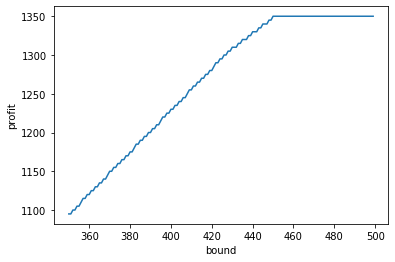

In [30]:
import matplotlib.pyplot as plt

bound=range(350,500)

plt.plot(bound,optimal_list)
plt.xlabel('bound')
plt.ylabel('profit')

plt.show()

As this plot clearly shows, after a certain amount of raw_1, profit stays the same. This is probably due to the fixed amounts of raw_2 and raw_3 at hand.

Let's find the first instance when we get that profit. For this, we first find the last profit amount printed by typing optimal_list[-1], then by using a for loop and break statement, we will find the first instance of getting that profit.

In [31]:
last_item=optimal_list[-1]

print(last_item)

for item in bound_optimal_list:
    if item[1]==last_item:
        print(item)
        break


1350.0
(450, 1350.0)


As you see, the first time we get $1350 total profit was when we used 450 units of raw_1. So, if we order more than 450 units, we won't be using them at all and that could be a waste in some situations.

Let's find how many units of product_1 and product_2 that we are making. For this, we have to change upper_bound column of the original dataframe df, and rewrite and run the LinProgProb again.

In [41]:
df['upper_bound']=[450,450,400,np.NaN]

#Define variables:
x_1=LpVariable('x_1',0,None,LpInteger) #number of product_1, note that it is an integer value
x_2=LpVariable('x_2',0,None,LpInteger) #number of product_2, note that it is an integer value

def LinProgProblem(df,x_1,x_2):
    problem=LpProblem("LP using dataframes", LpMaximize)
    
    problem += df.loc['profit_per_product','product_1']*x_1+df.loc['profit_per_product','product_2']*x_2
    problem += df.loc['raw_material_1','product_1']*x_1+df.loc['raw_material_1','product_2']*x_2<=df.loc['raw_material_1','upper_bound']
    problem += df.loc['raw_material_2','product_1']*x_1+df.loc['raw_material_2','product_2']*x_2<=df.loc['raw_material_2','upper_bound']
    problem += df.loc['raw_material_3','product_1']*x_1+df.loc['raw_material_3','product_2']*x_2<=df.loc['raw_material_3','upper_bound']
    print(problem)
    problem.solve()
    status=problem.status
    print("Problem solution status is {}".format(LpStatus[status]))
    if status==1:
        x_1=x_1.varValue
        x_2=x_2.varValue
        return 'optimal solution is {} and max profit is ${}'.format((x_1,x_2),value(problem.objective))

LinProgProblem(df,x_1,x_2)



LP using dataframes:
MAXIMIZE
10*x_1 + 15*x_2 + 0
SUBJECT TO
_C1: 3 x_1 + 5 x_2 <= 450

_C2: 4 x_1 + 5 x_2 <= 450

_C3: 5 x_1 + 4 x_2 <= 400

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer

Problem solution status is Optimal


'optimal solution is (0.0, 90.0) and max profit is $1350.0'

This shows that if we produce 90 units of product_2 and none of product_1, we would maximize the total profit.


In [43]:
x_1=0
x_2=90

raw_1=450
raw_2=450
raw_3=400

def C_1(x_1,x_2):
    return 3*x_1 + 5*x_2 

def C_2(x_1,x_2):
    return 4*x_1 + 5*x_2 

def C_3(x_1,x_2):
    return 5*x_1 + 4*x_2 

print('We used {} units of raw_1. There were {} units available.'.format(C_1(x_1,x_2),raw_1))
print('We used {} units of raw_2. There were {} units available.'.format(C_2(x_1,x_2),raw_2))
print('We used {} units of raw_3. There were {} units available.'.format(C_3(x_1,x_2),raw_3))


We used 450 units of raw_1. There were 450 units available.
We used 450 units of raw_2. There were 450 units available.
We used 360 units of raw_3. There were 400 units available.


Change the constraints, add or subtract more constraints and play with this problem. For example,

* What would happen if we increase the profit per one unit of product 1? Is there an upper limit due to constraints? 
* If we have a choice of increasing profit per one unit of only one item, which would be better? Increasing profit per one unit of product_1 or per one unit of product_2?
* How is this related to the geometry of the feasible region?

As you can see, linear programming is very useful in solving these type of optimization problems.